# Introduction:
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

##### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading the train & test datasets and exploring them further

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
train.shape, test.shape

((550068, 12), (233599, 11))

##### So there are more half a million rows in the train dataset, and about a quarter of a million in the test dataset. We have sufficient data.
At first glance we can see:
    1. Age is given in range, we will try to compute into numbers
    2. Ciy Category, Gender needs to be converted to numerical
    3. Stay in current city - should be a categorical column
    4. Product categories are masked columns. Product category 2 & 3 seem to have lots of null values. We will see how to compute them.
    5. Purchase is our Target variable and the data is in Dollars.
    6. Customer ID & Product ID is being repeated. We can group the whole dataset cutsomer-wise as well
    

All the data seems to be categorical in nature. We will first look at univariate analysis.

In [4]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
train.isnull().sum()[train.isnull().sum()!=0]

Product_Category_2    173638
Product_Category_3    383247
dtype: int64

In [6]:
test.isnull().sum()[test.isnull().sum()!=0]

Product_Category_2     72344
Product_Category_3    162562
dtype: int64

# Univariate Analysis

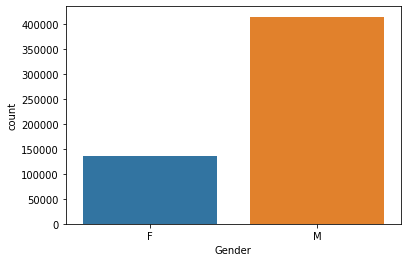

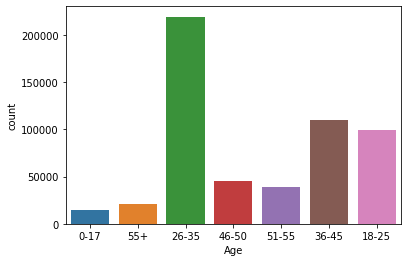

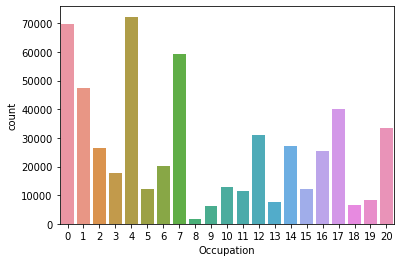

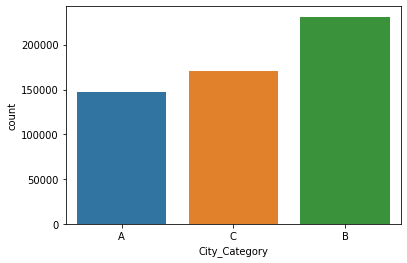

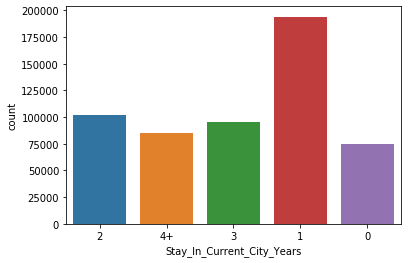

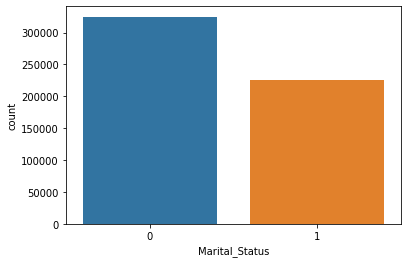

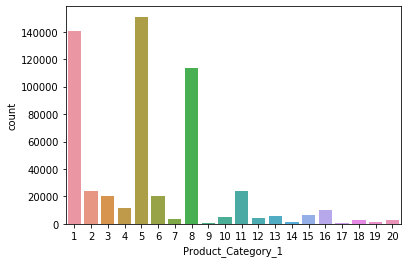

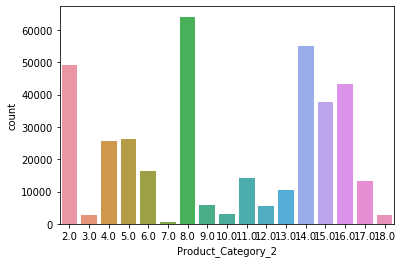

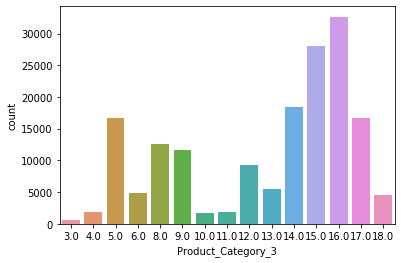

In [7]:
for i in train[['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3']]:
    sns.countplot(train[i])
    plt.show()

In [8]:
train.User_ID.nunique()

5891

In [9]:
train.Product_ID.nunique()

3631

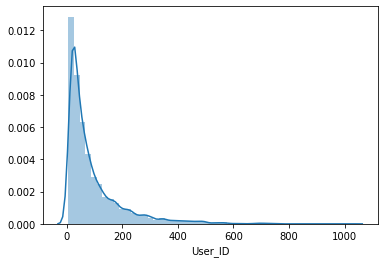

In [10]:
sns.distplot(train.User_ID.value_counts())

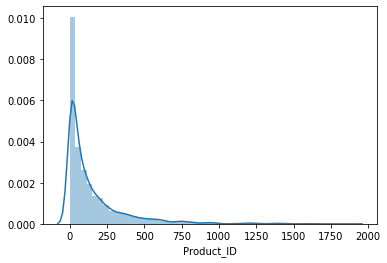

In [11]:
sns.distplot(train.Product_ID.value_counts())

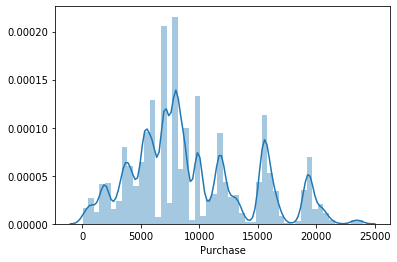

In [12]:
sns.distplot(train.Purchase)

In [13]:
train.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

#### Inference:
    1. There are about 5891 unique customers purchasing 3631 variety of products.
    2. Each entry of the customer is a new purchase which is ranging from a mere 6 products to 1026. For a customer to purchase 1026 products in huge in 1 sale in 1 month.
    3. Naturally both user id and product id are highly right skewed.
    4. Surpisingly more number of cutsomers are males.
    5. They seems to be mostly married (0) and less unmarried/ single (1)
    6. Occupation & Product cat 1 has 20 categories, product cat 2 and 3 have 17 and 15 respectively.
    7. More number of customers between the age 18-25, living in City Cat B since teh past 1 year
    8. Looking at the distribution ranging from $12 to max of $24k. This is a multi-gaussian distribution with clear clusters.

# Biavariate Analysis

Here we compare the variables with the target variable to get a better understanding

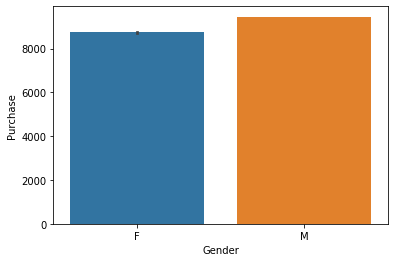

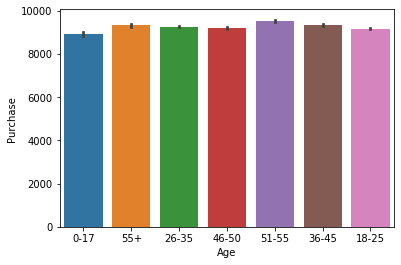

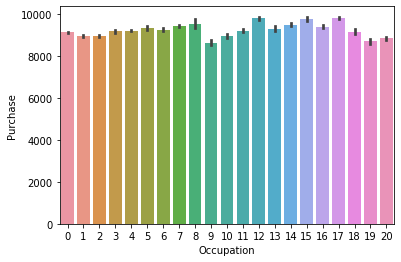

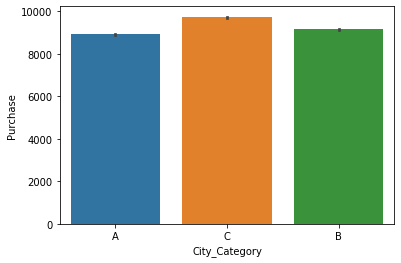

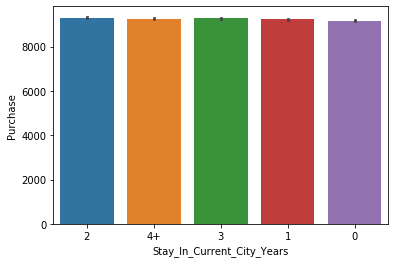

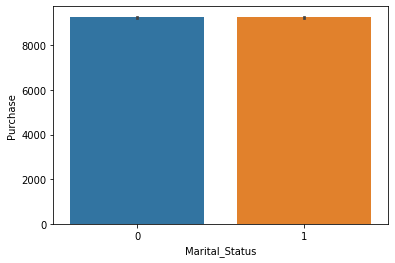

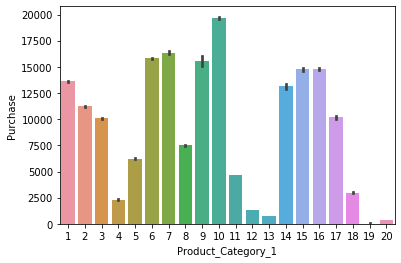

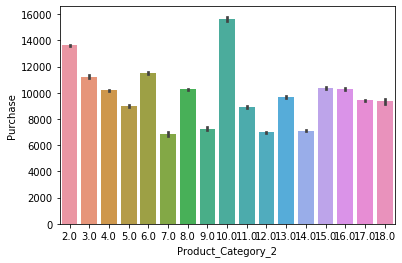

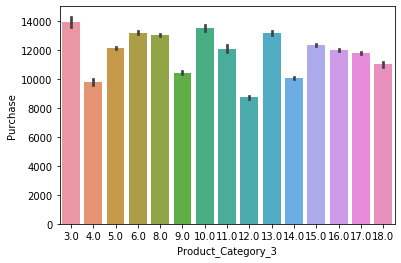

In [14]:
for i in train[['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3']]:
    sns.barplot(train[i], train.Purchase)
    plt.show()

In [15]:
train[train.User_ID=='1000001']['Purchase']

C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Series([], Name: Purchase, dtype: int64)

In [16]:
(train.groupby('User_ID')['Purchase'].sum()).describe()

count    5.891000e+03
mean     8.650166e+05
std      9.436445e+05
min      4.668100e+04
25%      2.376780e+05
50%      5.212130e+05
75%      1.119250e+06
max      1.053691e+07
Name: Purchase, dtype: float64

#### Inference:
    1. The purchase amount is definietly not in dollars as its ranging from a minimum of 4k to max of 1lac oer customer. 
    2. This also goes to prove that the store could have a lot of DUrable items like TV, Furniture, Electronics, etc.
    3. The purchase amount doesnt show any distinction based on the Occupation, Gender, Age, City & Marital Status
    4. The product category shows varying sales as the some products also belong to multiple categories.

# Imputing the null values

In [17]:
train.isnull().sum()[train.isnull().sum()!=0]

Product_Category_2    173638
Product_Category_3    383247
dtype: int64

Only product cat 2 and 3 have null values which will be imputed as 0 since they definitely belong to product cat 1.

In [18]:
train.Product_Category_2 = train.Product_Category_2.fillna(0)
train.Product_Category_3 = train.Product_Category_3.fillna(0)
test.Product_Category_2 = test.Product_Category_2.fillna(0)
test.Product_Category_3 = test.Product_Category_3.fillna(0)

In [19]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [20]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

## Treating the other variables

In [21]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [22]:
#Age - range to num
train['Age_cat'] = train.Age.replace({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
test['Age_cat'] = test.Age.replace({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})

In [23]:
#City Cat
train['City_cat'] = train.City_Category.replace({'A':1, 'B':2, 'C':3})
test['City_cat'] = test.City_Category.replace({'A':1, 'B':2, 'C':3})

In [24]:
#Gender
train['Gender'] = train.Gender.replace({'F':0, 'M':1})
test['Gender'] = test.Gender.replace({'F':0, 'M':1})

In [25]:
#Stay in current city
train['Stay_In_Current_City_Years'] = train.Stay_In_Current_City_Years.replace({'4+': 4})
test['Stay_In_Current_City_Years'] = test.Stay_In_Current_City_Years.replace({'4+': 4})

In [26]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype(int)
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].astype(int)

In [27]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
Age_cat                         int64
City_cat                        int64
dtype: object

In [28]:
train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_cat,City_cat
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,0.0,8370,1,1
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200,1,1


In [29]:
newtrain = train.drop(['User_ID','Product_ID','Age', 'City_Category'], axis = 1)
newtest = test.drop(['User_ID','Product_ID','Age', 'City_Category'], axis = 1)

In [30]:
newtrain.head()

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_cat,City_cat
0,0,10,2,0,3,0.0,0.0,8370,1,1
1,0,10,2,0,1,6.0,14.0,15200,1,1
2,0,10,2,0,12,0.0,0.0,1422,1,1
3,0,10,2,0,12,14.0,0.0,1057,1,1
4,1,16,4,0,8,0.0,0.0,7969,7,3


In [31]:
newtrain.shape, newtest.shape

((550068, 10), (233599, 9))

Now we dont have any null values. We now move to statiscally find the important variables for model building

In [32]:
newtrain.columns

Index(['Gender', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'Age_cat', 'City_cat'],
      dtype='object')

# Statistical Tests

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model1 = ols("Purchase~Gender+Occupation+Stay_In_Current_City_Years+Marital_Status+Product_Category_1+Product_Category_2+Product_Category_3+Age_cat+City_cat",
           data = newtrain).fit()


In [36]:
anova_tbl = sm.stats.anova_lm(model1)
anova_tbl

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,5.054122e+10,5.054122e+10,2362.685807,0.000000e+00
Occupation,1.0,2.662356e+09,2.662356e+09,124.459026,6.732507e-29
Stay_In_Current_City_Years,1.0,2.384818e+08,2.384818e+08,11.148478,8.410624e-04
Marital_Status,1.0,5.917990e+04,5.917990e+04,0.002767,9.580524e-01
Product_Category_1,1.0,1.616939e+12,1.616939e+12,75588.202709,0.000000e+00
Product_Category_2,1.0,1.175466e+10,1.175466e+10,549.503414,1.852662e-121
Product_Category_3,1.0,3.841525e+11,3.841525e+11,17958.248786,0.000000e+00
Age_cat,1.0,1.469083e+10,1.469083e+10,686.762724,2.802625e-151
City_cat,1.0,3.133875e+10,3.133875e+10,1465.014800,4.152128e-320
Residual,550058.0,1.176652e+13,2.139143e+07,NaN,NaN


In [37]:
anova_tbl['PR(>F)']>0.05

Gender                        False
Occupation                    False
Stay_In_Current_City_Years    False
Marital_Status                 True
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Age_cat                       False
City_cat                      False
Residual                      False
Name: PR(>F), dtype: bool

Marital Status is not controbuting much to the model as teh pavlue is more than 0.05,

In [ ]:
newtrain = newtrain.drop(['Marital_Status'], axis = 1)
newtest = newtest.drop(['Marital_Status'], axis = 1)

# Model builidng

In [ ]:
X = newtrain.drop('Purchase', axis =1)
y = newtrain['Purchase']

In [ ]:
#Stacked model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,GradientBoostingRegressor

from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression

def stackedmodels():
    models = dict()
    models['LR'] = LinearRegression()
    models['Lasso'] = Lasso()
    models['Ridge'] = Ridge()
    models['Tree'] = DecisionTreeRegressor()
    #models['RF'] = RandomForestRegressor()
    models['Bagg'] = BaggingRegressor()
    models['GBR'] = GradientBoostingRegressor()
    #models['XGB'] = XGBRegressor()
    return(models)

In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

def eval_models(model):
    cross_v= RepeatedKFold(n_splits=10, random_state=1)
    scores = -cross_val_score(model, X, y, scoring = "neg_mean_absolute_error",
                            cv = cross_v, error_score="raise", n_jobs = -1)
    return(scores)

    

In [ ]:
X['Stay_In_Current_City_Years'].value_counts()

In [ ]:
# Apply Loop so that scores can be generated for all the Models

models = stackedmodels()

# Evaluations
result, names = list(), list()

for name, model in models.items():
    scores = eval_models(model) # Evaluation Funct that we have created
    result.append(scores) # Save the Cross Val Score
    names.append(name) # Save the Name of the Model
    print(">%s %3.f (%.3f)" % (name, scores.mean(), scores.std()))


In [ ]:
plt.boxplot(result, labels = names, showmeans = True)
plt.xticks(rotation = 90)
plt.ylabel("MAE")
plt.xlabel("Models")
plt.title("Model Performance")
plt.show()

In [ ]:
from xgboost.sklearn import XGBRegressor
GBR = GradientBoostingRegressor()

# Defined the Xtrain and YTrain
X = newtrain.drop("Purchase", axis = 1)
y = newtrain.Purchase

# Fit and Predict
pred_GBR = GBR.fit(X,y).predict(newtest)

# Export for submission

solution = pd.DataFrame({"Purchase": pred_GBR, 
                        "User_ID": test.User_ID,
                        "Product_ID": test.Product_ID})

# Export it in csv
solution.to_csv("GBRMODEL.csv", index = False)

# Non-Prarametric tests

In [ ]:
import scipy.stats as stats
from scipy.stats import f_oneway, kruskal, mannwhitneyu , levene, ttest_ind, kruskal, mannwhitneyu

In [ ]:
#Checking normality for Purchase
stats.shapiro(newtrain['Purchase'])

In [ ]:
newtrain.columns

In [ ]:
newtrain.Age_cat.unique()

In [ ]:
#Gender
#P-value is 0, Gender is significant

kruskal((newtrain[newtrain['Gender']==0]['Purchase']),(newtrain[newtrain['Gender']==1]['Purchase']) )

In [ ]:
#City_cat
#It is significant

kruskal((newtrain[newtrain['City_cat']==1]['Purchase']),(newtrain[newtrain['City_cat']==2]['Purchase']), (newtrain[newtrain['City_cat']==3]['Purchase']) )

In [ ]:
#Stay_In_Current_City_Years
#NA

kruskal((newtrain[newtrain['Stay_In_Current_City_Years']==0]['Purchase']),
        (newtrain[newtrain['Stay_In_Current_City_Years']==1]['Purchase']), 
        (newtrain[newtrain['Stay_In_Current_City_Years']==2]['Purchase']),(newtrain[newtrain['Stay_In_Current_City_Years']==3]['Purchase']), 
        (newtrain[newtrain['Stay_In_Current_City_Years']==4]['Purchase']) )

In [ ]:
#Age_cat
#Significant

kruskal((newtrain[newtrain['Age_cat']==1]['Purchase']),
        (newtrain[newtrain['Age_cat']==2]['Purchase']), 
        (newtrain[newtrain['Age_cat']==3]['Purchase']),(newtrain[newtrain['Age_cat']==4]['Purchase']), 
        (newtrain[newtrain['Age_cat']==5]['Purchase']), (newtrain[newtrain['Age_cat']==6]['Purchase']), 
        (newtrain[newtrain['Age_cat']==7]['Purchase']))

# Backward Elimination

In [38]:
X = newtrain.drop("Purchase", axis = 1)
y = newtrain.Purchase

In [39]:
X.columns

Index(['Gender', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Age_cat', 'City_cat'],
      dtype='object')

In [40]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

In [41]:
X_1 = sm.add_constant(X)


C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:
X.dtypes

Gender                          int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Age_cat                         int64
City_cat                        int64
dtype: object

In [43]:
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                 1.097e+04
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:45:11   Log-Likelihood:            -5.4227e+06
No. Observations:              550068   AIC:                         1.085e+07
Df Residuals:                  550058   BIC:                         1.085e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       9089.2275     29.882    304.173      0.000    9030.660    9147.795
Gender                       475.7391     14.584     32.622      0.000     447.156     504.322
Occupation                     5.7318      0.968      5.924      0.000       3.835       7.628
Stay_In_Current_City_Years     8.5541      4.840      1.767      0.077      -0.933      18.041
Marital_Status               -48.4703     13.348     -3.631      0.000     -74.632     -22.309
Product_Category_1          -348.0788      1.723   -202.060      0.000    -351.455    -344.702
Product_Category_2            12.5424      1.009     12.433      0.000      10.565      14.519
Product_Category_3           143.6721      1.085    132.401      0.000     141.545     145.799
Age_cat                      106.3098      4.910     21.650      0.000      96.686     115.934
City_cat                     316.7829      8.276     38.276      0.000     300.561     333.004
==============================================================================
Omnibus:                    57263.559   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79655.860
Skew:                           0.833   Prob(JB):                         0.00
Kurtosis:                       3.836   Cond. No.                         71.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Gender', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Age_cat', 'City_cat']


In [53]:
X_bk = newtrain[['Gender', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Age_cat', 'City_cat']]
y

0          8370
1         15200
2          1422
3          1057
4          7969
5         15227
6         19215
7         15854
8         15686
9          7871
10         5254
11         3957
12         6073
13        15665
14         5378
15         2079
16        13055
17         8851
18        11788
19        19614
20         8584
21         9872
22         9743
23         5982
24        11927
25        16662
26         5887
27         6973
28         5391
29        16352
          ...  
550038      596
550039      595
550040       26
550041      488
550042      243
550043       48
550044       62
550045      252
550046      236
550047      244
550048      591
550049      473
550050      368
550051      489
550052      239
550053      371
550054       60
550055      238
550056      254
550057       61
550058      121
550059       48
550060      494
550061      599
550062      473
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 

In [54]:
X_bk.dtypes

Gender                  int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Age_cat                 int64
City_cat                int64
dtype: object

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression

In [49]:
DT=DecisionTreeRegressor(random_state=0)
LR=LinearRegression()
knn=KNeighborsRegressor()
RF=RandomForestRegressor(random_state=0)
ABR = AdaBoostRegressor(random_state=0)
AB_RF = AdaBoostRegressor(base_estimator=RF, random_state=0)
AB_DT = AdaBoostRegressor(random_state=0)
GBoost=GradientBoostingRegressor(random_state=0)
xgbr=XGBRegressor(random_state=0)

In [ ]:
LR.fit(X_bk, y)
DT.fit(X_bk, y)
knn.fit(X_bk, y)
GBR.fit(X_bk, y)
xgbr.fit(X_bk, y)
AB_DT.fit(X_bk, y)
RF.fit(X_bk, y)
AB_RF.fit(X_bk, y)

In [56]:
#Stacked model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,GradientBoostingRegressor

from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression

def stackedmodels():
    models = dict()
    models['LR'] = LinearRegression()
    models['Lasso'] = Lasso()
    models['Ridge'] = Ridge()
    models['Tree'] = DecisionTreeRegressor()
    models['RF'] = RandomForestRegressor()
    models['Bagg'] = BaggingRegressor()
    models['GBR'] = GradientBoostingRegressor()
    models['XGB'] = XGBRegressor()
    return(models)

In [57]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

def eval_models(model):
    cross_v= RepeatedKFold(n_splits=10, random_state=1)
    scores = -cross_val_score(model, X_bk, y, scoring = "neg_mean_absolute_error",
                            cv = cross_v, error_score="raise", n_jobs = -1)
    return(scores)

    

In [ ]:
# Apply Loop so that scores can be generated for all the Models

models = stackedmodels()

# Evaluations
result, names = list(), list()

for name, model in models.items():
    scores = eval_models(model) # Evaluation Funct that we have created
    result.append(scores) # Save the Cross Val Score
    names.append(name) # Save the Name of the Model
    print(">%s %3.f (%.3f)" % (name, scores.mean(), scores.std()))


>LR 3530 (12.365)
>Lasso 3530 (12.365)
>Ridge 3530 (12.365)
>Tree 2283 (8.268)


In [ ]:
plt.boxplot(result, labels = names, showmeans = True)
plt.xticks(rotation = 90)
plt.ylabel("MAE")
plt.xlabel("Models")
plt.title("Model Performance")
plt.show()